In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')


In [4]:
df=pd.read_csv('sales.csv',parse_dates=['Date'])
df.info()
               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
Date       50 non-null datetime64[ns]
Amount     50 non-null int64
Product    50 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ KB


In [5]:
df.head()

,Date,Amount,Product
0,2017-01-20,5411,b
1,2017-02-22,5000,c
2,2017-03-01,7260,a
3,2017-03-14,2117,c
4,2017-04-15,7516,b


In [6]:
df['Month']=df['Date'].dt.month
df.head()

,Date,Amount,Product,Month
0,2017-01-20,5411,b,1
1,2017-02-22,5000,c,2
2,2017-03-01,7260,a,3
3,2017-03-14,2117,c,3
4,2017-04-15,7516,b,4


In [8]:
g=df.groupby(['Month','Product'])['Amount'].sum()
g

Month  Product
1      a           7260
       b           9258
       c           1740
2      a           6534
       c           5000
3      a           7260
       c           2117
4      a          11616
       b          13221
       c           5440
5      a           7119
       c           2990
6      a          11071
       c           7176
7      a           4200
       b          15973
       c           2901
8      a          10342
       c           6662
9      c            660
10     a           2100
       b          10711
       c          14520
11     a           7260
       c           3710
12     a          11616
       b          14800
Name: Amount, dtype: int64

In [10]:
g=g.unstack()
g

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,6534.0,NaN,5000.0
3,7260.0,NaN,2117.0
4,11616.0,13221.0,5440.0
5,7119.0,NaN,2990.0
6,11071.0,NaN,7176.0
7,4200.0,15973.0,2901.0
8,10342.0,NaN,6662.0
9,NaN,NaN,660.0


In [11]:
revenue=g.fillna(0).cumsum()
revenue

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,13794.0,9258.0,6740.0
3,21054.0,9258.0,8857.0
4,32670.0,22479.0,14297.0
5,39789.0,22479.0,17287.0
6,50860.0,22479.0,24463.0
7,55060.0,38452.0,27364.0
8,65402.0,38452.0,34026.0
9,65402.0,38452.0,34686.0


<IPython.core.display.Javascript object>


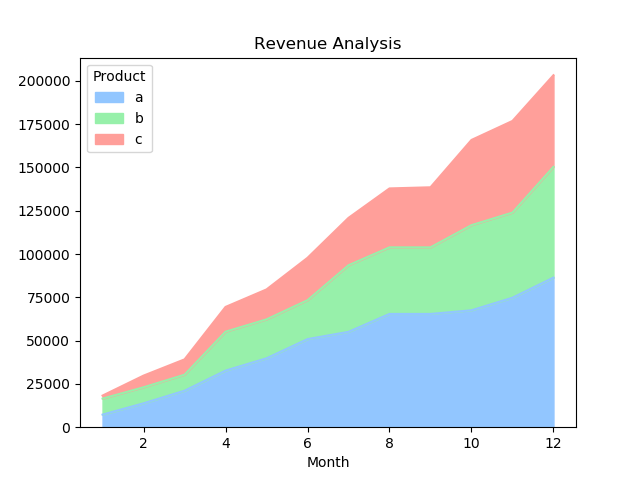

In [12]:
ax=revenue.plot.area(title="Revenue Analysis")

<IPython.core.display.Javascript object>


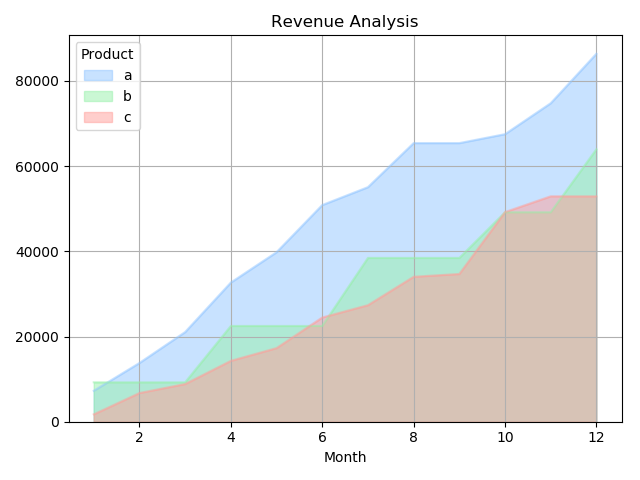

In [13]:
fig,ax=plt.subplots()
revenue.plot.area(title="Revenue Analysis",ax=ax,stacked=False,grid=True)
fig.tight_layout()

In [14]:
total_revenue=df.groupby('Month')['Amount'].sum().cumsum()
total_revenue

Month
1      18258
2      29792
3      39169
4      69446
5      79555
6      97802
7     120876
8     137880
9     138540
10    165871
11    176841
12    203257
Name: Amount, dtype: int64

<IPython.core.display.Javascript object>


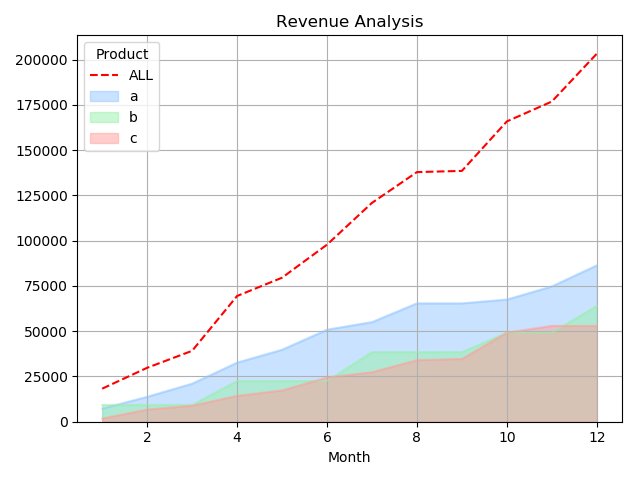

In [15]:
fig,ax=plt.subplots()
total_revenue.plot(ax=ax,style='r--',legend=True,label="ALL")
revenue.plot.area(title="Revenue Analysis",ax=ax,stacked=False,grid=True)
fig.tight_layout()

In [18]:
df=pd.read_csv('athletes.csv')
df.head()

,id,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0


In [20]:
top=df.groupby('nationality')[['gold','silver','bronze']].sum().sort_values('gold',ascending=False).head(10)
top

,gold,silver,bronze
nationality,,,
USA,139,54,71
GBR,64,55,26
RUS,52,29,34
GER,49,44,67
CHN,46,30,37
BRA,37,8,6
AUS,23,34,25
ARG,21,1,0
FRA,20,54,21


<IPython.core.display.Javascript object>


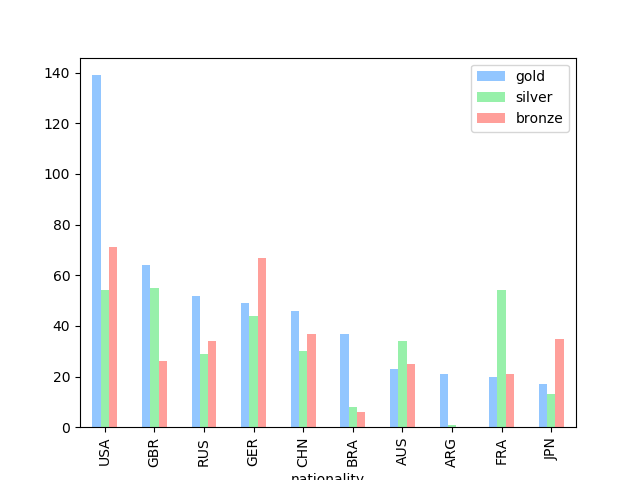

In [21]:
ax=top.plot.bar()

In [ ]:
fig,ax=plt.subplots()
top.plot.bar(color)